In [15]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from pandas import DataFrame
from sklearn import preprocessing
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

In [9]:
dataset= r'train.xlsx' #筛选特征后的训练集

data=pd.DataFrame(pd.read_excel(dataset))

X=data.values[:,:-1] #输入数据归一化

for i in range(X.shape[1]):
    X[:,[i]] = preprocessing.MinMaxScaler().fit_transform(X[:,[i]])
    
y=data.values[:,-1] #目标数值


In [10]:
for i in range(1,10): #循环法调参
 for j in range(1,10):
  clf = RandomForestRegressor(random_state=i,n_estimators=j,criterion='squared_error') #随机森林
  clf.fit(X,y) #拟合
  sse = np.sum((y - clf.predict(X)) ** 2)
  sst = np.sum((y - np.mean(X)) ** 2)
  R2 = 1 - sse / sst #R^2
  o=pearsonr(y,clf.predict(X)) #pearson系数
  if o[0]>0.9 and R2>0.9: #筛选条件
    print(o[0],R2,i,j)

0.9725222564616167 0.9863375317413399 1 1
0.9859229762056619 0.9932422570514342 1 2
0.9780927909040253 0.9895966550589604 1 3
0.980448914247426 0.9904969783958942 1 4
0.98251902091935 0.9915562492903892 1 5
0.9837989737895352 0.9920710785314864 1 6
0.9853124456271488 0.9927883210954475 1 7
0.987464357837763 0.9937988166799935 1 8
0.9876489388255524 0.9939059477271265 1 9
0.947247614371517 0.9752091109550526 2 2
0.9674046029600476 0.9846042249418523 2 3
0.9782472371409674 0.9895449351130527 2 4
0.9822021837659287 0.9914035006222249 2 5
0.9823045253438905 0.991415040223669 2 6
0.9836786932524024 0.9920472762867839 2 7
0.985825427636025 0.9930319445428328 2 8
0.9874188093440027 0.9937849140093458 2 9
0.9291882717224045 0.9665464330023927 3 1
0.9677319556470281 0.9847743939692019 3 2
0.9768753770463038 0.9890541093603291 3 3
0.9788475760881776 0.989893201432333 3 4
0.9810063867700747 0.9907444465073635 3 5
0.9839043775895302 0.992145902492814 3 6
0.9862546357004518 0.9931933908158648 3 7
0

In [11]:
lrTool=RandomForestRegressor(random_state=i,n_estimators=j,criterion='squared_error') #拟合

lrTool.fit(X,y)

RandomForestRegressor(n_estimators=9, random_state=9)

In [12]:
mse = mean_squared_error(y, lrTool.predict(X))
rmse = mse ** (1/2)

sse = np.sum((y - lrTool.predict(X)) ** 2)
sst = np.sum((y - np.mean(X)) ** 2)
R2= 1 - sse / sst

In [13]:
print(R2) #准确率
print(rmse)
print(pearsonr(y,lrTool.predict(X)))

0.994301437659519
0.020914808732380687
(0.9883826319254124, 1.41965e-319)


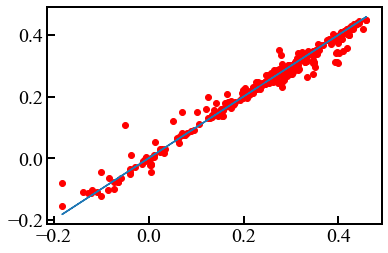

In [16]:
# 画图显示
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y,y,label='Real Data')
plt.scatter(y,lrTool.predict(X),label='Predict',c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)
plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=20)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=20)
xminorLocator = MultipleLocator(1000)
yminorLocator = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.show()